# Exploratory Data Analysis for Restaurant Business Rankings 2020

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_top100 = pd.read_csv('./data/Independence100.csv')
df_top250 = pd.read_csv('./data/Top250.csv')

## Features of top100 independent restaurants
There are 7 features in the original dataset of top250 restaurants.
* Rank: Position in ranking
* Restaurant: Name of Restaurant
* Sales: Annual sales in $
* Average Check: Average client expenses per visit (sales / number of visits)
* City: City of origin of the restaurant
* State: State of origin of the restaurant
* Meals Served: Number of meals served in 2019

In [ ]:
df_top100.head()

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0


## Features of top250 restaurants
There are 9 features in the original dataset of top250 restaurants.
* Rank: Position in ranking
* Restaurant: Name of Restaurant
* Content: Description, only for certain restaurants
* Sales: in 2019 ($000000)
* YOY_Sales: Year on year sales increase in %
* Units: Number of premises in US
* YOY_Units: Year on year premises increase in %
* Headquarters: Place of the restaurant's headquarters
* Segment_Category: Menu type and / or industry segment

In [ ]:
df_top250.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


### Data Preprocessing
Split menu type and industry type from segment_category and use "NAN" for undefined industry type.

In [ ]:
df_top250['Industry_Types'] = [x.split('&')[0] if len(x.split('&')) > 1 else 'NAN' for x in df_top250['Segment_Category']]
df_top250['Menu_Types'] = [x.split('&')[1].replace(' ', '') if len(x.split('&')) > 1 else x.replace(' ', '') for x in df_top250['Segment_Category']]
df_top250 = df_top250.drop('Segment_Category',axis=1)

In [ ]:
df_top250.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Industry_Types,Menu_Types
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service,Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service,CoffeeCafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service,Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service,Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service,Burger


## Descriptive statistics of top100 independent restaurants
* Sales: The mean is \$17833434.32 and median is \$17300775.50
* Average Check: The mean is 69.05 and median is 65.5
* Meals Served: The mean is 317166.66 and median is 257097.00

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df_top100.drop('Rank',axis=1).describe()

,Sales,Average Check,Meals Served
count,100.00,100.00,100.00
mean,17833434.32,69.05,317166.66
std,5010408.03,34.74,192211.39
min,11391678.00,17.00,87070.00
25%,14094835.75,39.00,189492.50
50%,17300775.50,65.50,257097.00
75%,19903916.00,95.00,372079.00
max,39080335.00,194.00,959026.00


## Descriptive statistics of top100 independent restaurants
* Sales: The mean is \$ 1242.74 million and median is \$ 17300775.50 million
* Units: The mean is 850.08 and median is 207.00

In [ ]:
df_top250.drop('Rank',axis=1).describe()

,Sales,Units
count,250.00,250.00
mean,1242.74,850.08
std,3365.23,2296.15
min,126.00,13.00
25%,181.00,85.00
50%,330.00,207.00
75%,724.75,555.25
max,40412.00,23801.00


## Summary of top250 restaurants by Menu and Industry Types
* Most top restaurants try to provide varied menu.
* Only one top resaurant provide healthy menu.
* Only one top resaurant provide ethnic menu.

In [ ]:
df_top250['Menu_Types'].value_counts()

VariedMenu        31
Burger            27
Mexican           19
Pizza             18
FamilyStyle       17
Chicken           17
Sandwich          17
Italian/Pizza     14
Steak             14
Seafood           11
BakeryCafe        10
SportsBar          9
CoffeeCafe         8
BBQ                7
Snack              6
FrozenDesserts     6
Asian/Noodle       5
FamilyCasual       5
Asian              4
Beverage           3
Healthy            1
Ethnic             1
Name: Menu_Types, dtype: int64

Text(0.5, 1.0, 'Pie Chart of top250 restaurants by menu types')

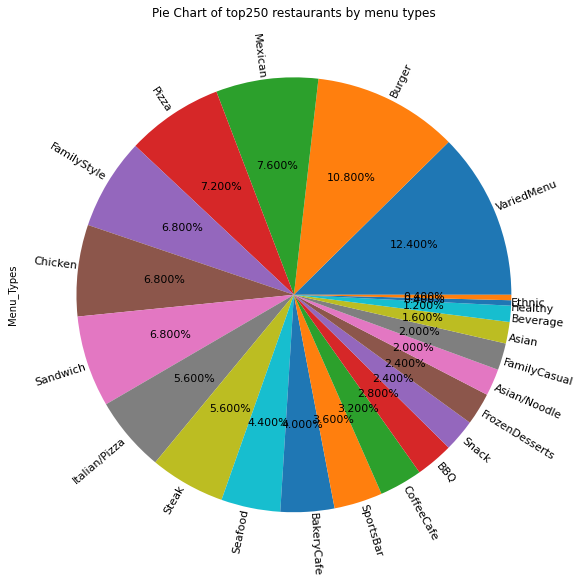

In [ ]:
fig = plt.figure(figsize =(20, 10))
df_top250['Menu_Types'].value_counts().plot.pie(label="Menu_Types", autopct='%.3f%%', fontsize = 11,labeldistance=1,rotatelabels=20)
plt.title("Pie Chart of top250 restaurants by menu types")

* Except undefined industry type, most restaurants are belong to quick service.
* Only one top resaurant belongs to fine dining.

In [ ]:
df_top250['Industry_Types'].value_counts()

NAN               151
Quick Service      47
Casual Dining      23
Fast Casual        21
Family Dining       7
Fine Dining         1
Name: Industry_Types, dtype: int64

## Summary of top100 restaurants by Location
* Most top 100 independent restaurants are located at New York, Chicago and Las Vegas

In [ ]:
df_top100['City'].value_counts()

New York           21
Chicago            15
Las Vegas          11
Washington          9
San Francisco       5
Miami               3
Frankenmuth         2
Nashville           2
Indianapolis        2
Orlando             2
Atlanta             2
Ft. Lauderdale      2
Raleigh             1
Bal Harbour         1
Amarillo            1
Malibu              1
Denver              1
Daly City           1
McLean              1
Boston              1
Rosemont            1
West Hollywood      1
Atlantic City       1
Philadelphia        1
Los Angeles         1
Wheeling            1
La Jolla            1
Houston             1
Miami Beach         1
Austin              1
Cape May            1
Burbank             1
Coalinga            1
Portland            1
Oak Brook           1
Fort Lauderdale     1
Name: City, dtype: int64

Text(0.5, 1.0, 'Pie Chart of top100 independent restaurants by location')

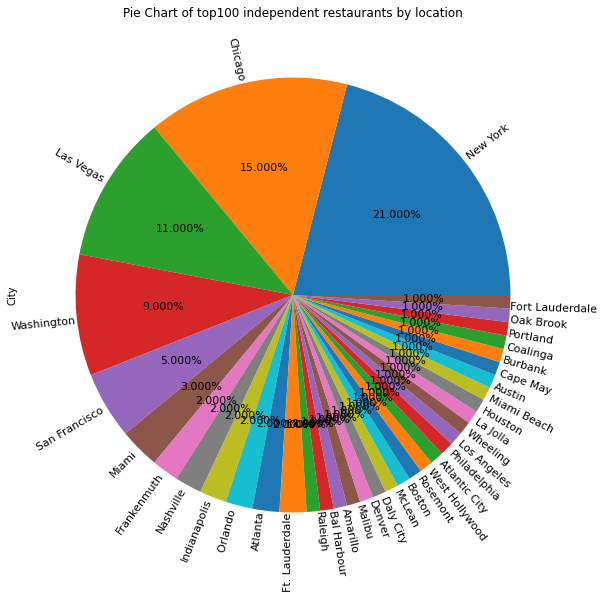

In [ ]:
fig = plt.figure(figsize =(20, 10))
df_top100['City'].value_counts().plot.pie(label="City", autopct='%.3f%%', fontsize = 11,labeldistance=1,rotatelabels=20)
plt.title("Pie Chart of top100 independent restaurants by location")



## Sales Distributions

### Sales distribution of top 250 restaurants
* 1st and 2nd ranking restaurants' sales are much higher than other restaurants

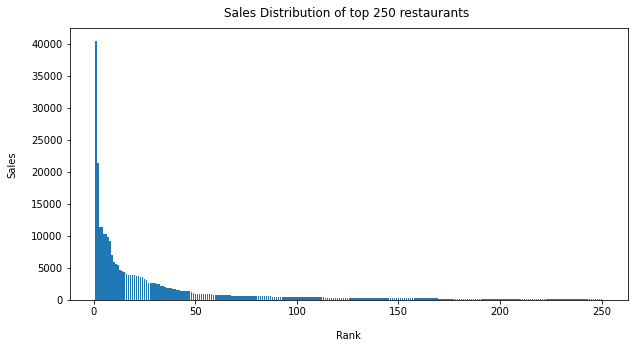

In [ ]:
# df_top250['Sales'].plot(kind='bar', figsize=(20, 10), rot=10,fontsize=10)
fig= plt.figure(figsize=(10,5))
plt.bar(df_top250['Rank'],df_top250['Sales'],align='center')
plt.xlabel("Rank", labelpad=14)
plt.ylabel("Sales", labelpad=14)
plt.title("Sales Distribution of top 250 restaurants ", y=1.02);

### Sales distribution of top 100 independent restaurants
* Except top3 restaurants, sale differences between other restaurants are not very big.


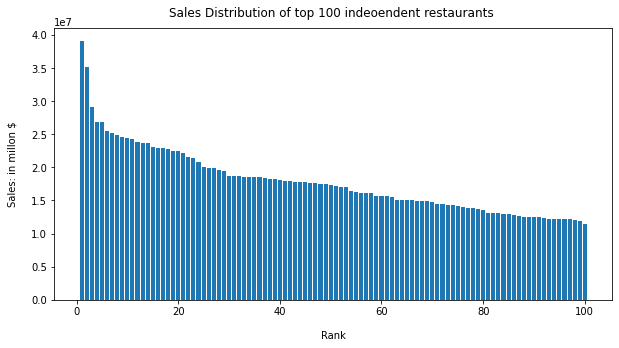

In [ ]:
fig= plt.figure(figsize=(10,5))
plt.bar(df_top100['Rank'],df_top100['Sales'],align='center')
plt.xlabel("Rank", labelpad=14)
plt.ylabel("Sales: in millon $", labelpad=14)
plt.title("Sales Distribution of top 100 indeoendent restaurants ", y=1.02);